In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tqdm import tqdm

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mallikamuskan","key":"a8a8a71d58780d8f8be44320086e6899"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d oddrationale/mnist-in-csv

 46% 7.00M/15.2M [00:00<00:00, 66.9MB/s]
100% 15.2M/15.2M [00:00<00:00, 100MB/s] 


In [ ]:
!unzip /content/mnist-in-csv.zip

Archive:  /content/mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


In [ ]:
df=pd.read_csv('/content/mnist_train.csv')

In [ ]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(60000, 785)

In [ ]:
X_train=df.iloc[:,1:].values
Y_train=df.iloc[:,0].values

In [ ]:
def image_plot(x):
  x=x.reshape((28,28))
  plt.imshow(x,cmap='gray')


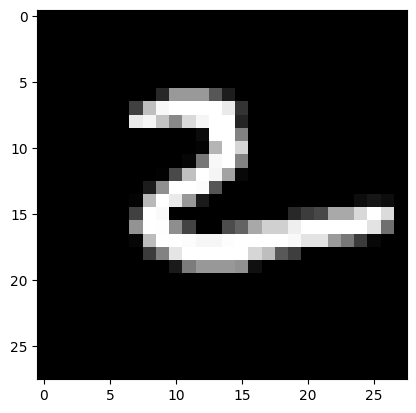

In [ ]:
# test=df.values
# image_plot(test[4][1:])
image_plot(X_train[109])

In [ ]:
Y_train[109]

2

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.2)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((48000, 784), (12000, 784), (48000,), (12000,))

In [ ]:
def distance(x1,x2):
  return np.sqrt(sum((x1-x2)**2))


def knn(X,Y,query,k=7):
  vals=[]
  for i in range(0,X.shape[0]):
    dist=distance(X[i],query)
    vals.append([dist,Y[i]])

  vals=sorted(vals)
  vals=vals[:k]
  vals=np.array(vals)
  new_val=np.unique(vals [:,1],return_counts=True)
  index=new_val[1].argmax()
  ans=new_val[0][index]

  return ans


In [ ]:
pred=[]
for i in tqdm(range(5)):
  pred.append(knn(X_train,Y_train,X_test[i]))

100%|██████████| 5/5 [00:28<00:00,  5.70s/it]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=7,n_jobs=-1)
clf.fit(X_train,Y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=7)

In [ ]:
pred2=clf.predict(X_test[:5])

In [ ]:
pred,pred2


([3.0, 4.0, 9.0, 6.0, 3.0], array([3, 4, 9, 6, 3]))

In [ ]:
(pred==pred2).sum()

5

In [ ]:
(Y_test[:5]==pred2).sum()/5

1.0

Evaluation Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test[:20],pred2)

array([[2, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 2]])

In [ ]:
clf.score(X_test[:20],Y_test[:20])

1.0

KMEANS